In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
in_dir = 'data/'
in_file = 'ex6_ImagData2Load.mat'
data = sio.loadmat(in_dir + in_file)
ImgT1 = data['ImgT1']
ImgT2 = data['ImgT2']
ROI_GM = data['ROI_GM']
ROI_WM = data['ROI_WM']

In [3]:
#Plot of histogram
def plot_hist(x, title = "Unknown title", bins = 40):
    plt.hist(x.ravel(), bins = bins)
    plt.title(title)
    plt.ylabel('Frequency')

def show_img(img, title = 'Unknown title', cmap = 'gray'):
    plt.imshow(img, cmap = cmap)
    plt.title(title)

def plot_scatter(img, title = 'Unknown title'):
    x = range(len(img.ravel()))
    y = img.ravel()
    plt.xlim(100)
    plt.ylim(max(y[:100]) + 10)
    print(max(y))
    plt.scatter(x,y)
    plt.title(title)

def plot_2d_hist(img1, img2, title = 'Unknown title', cmap = 'gray'):
    plt.hist2d(img1.ravel(), img2.ravel(), cmap = cmap)
    plt.title(title)

758


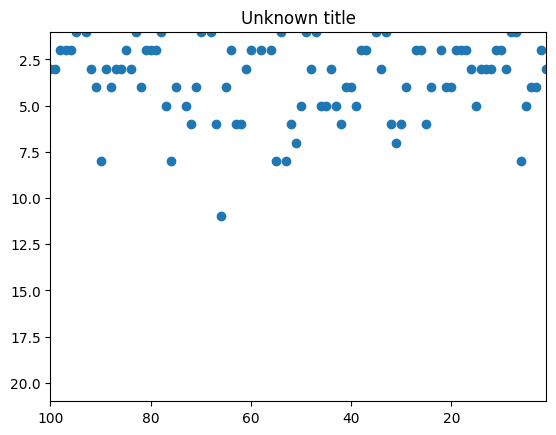

In [4]:
#show_img(ImgT1)
plot_scatter(ImgT1)

In [5]:
print(ImgT1.shape, ImgT2.shape)

(224, 216) (224, 216)


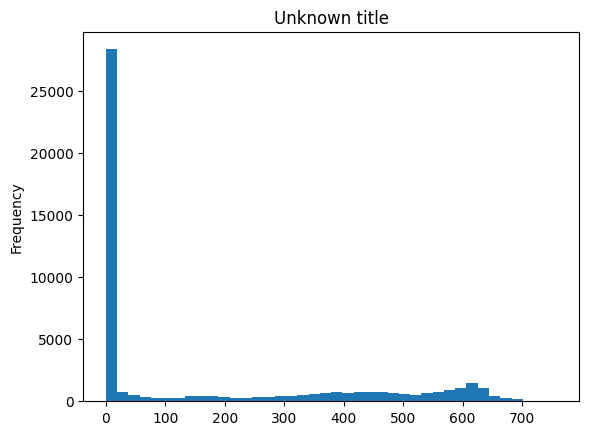

In [6]:
plot_hist(ImgT1)

The threshold for white tissue could be set to about >520

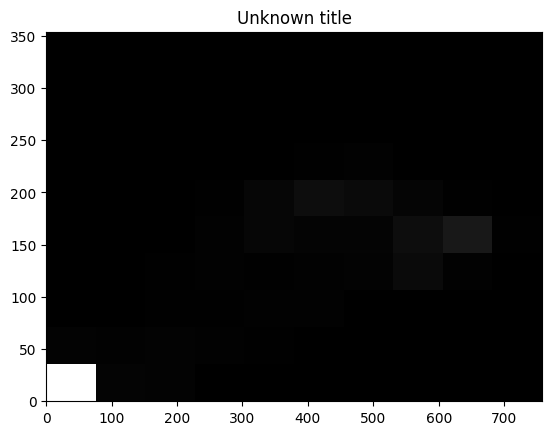

In [7]:
plot_2d_hist(ImgT1, ImgT2)

The threshold between wm and gm could be set to about 600 for T1 and 150 for T2. But this is not clear

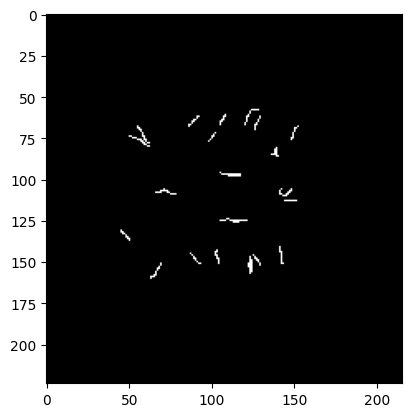

In [8]:
#Placeing the annotated images into different classes
plt.imshow(ROI_GM, cmap = 'gray')

In [9]:
def get_image_from_mask(image, mask):
    if image.shape != mask.shape:
        return "Shape of image and mask is not the same"
    new_img = np.zeros(image.shape)
    for i, row in enumerate(image):
        for j, pixel in enumerate(row):
            if mask[i,j]:
                new_img[i,j] = pixel
    return new_img


(224, 216)
(224, 216)


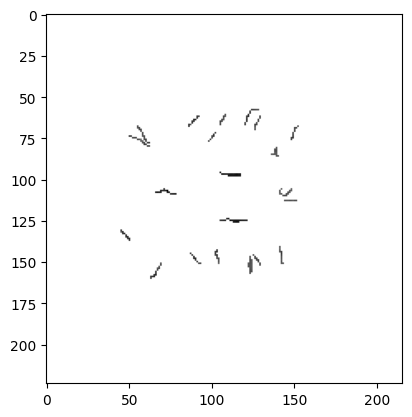

In [26]:
#plt.imshow(np.logical_not(ROI_WM), cmap = 'gray')
C1_T1 = get_image_from_mask(ImgT1, ROI_WM)
C1_T2 = get_image_from_mask(ImgT2, ROI_WM)
C2_T1 = get_image_from_mask(ImgT1, ROI_GM)
C2_T2 = get_image_from_mask(ImgT2, ROI_WM)

print(ImgT1.shape)
print(ROI_WM.shape)
plt.imshow(C2, cmap = "gray_r")

This was very much unexpected. The marked areas are very few and not very large. The colored arrowes on the given example seems to point to much larger areas.

In [25]:
tranning_rois = ['']


dict_keys(['__header__', '__version__', '__globals__', 'ImgT1', 'ImgT2', 'ROI_GM', 'ROI_WM'])
